In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


In [2]:
!pip install -q pywaffle

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
from pywaffle import Waffle
import matplotlib.pyplot as plt
init_notebook_mode(connected=False)

#importing modeling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace = True)
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  
0  StatusActive   50.0         Success  
1  StatusActive  29.75         Success  
2  StatusActive     NaN        Success  
3  StatusActive   65.0         Success  
4  StatusActive  145.0         Success

In [5]:
df.shape

(4324, 7)

In [6]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

The dataset has 7 Different Columns

Company Name - The name of the company that undertook the space mission

Location - The location of launch

Datum - The date and time of the launch

Detail - The Name of the Launch Vehicles

Status Rocket - The current status of the rocket

Rocket - The cost (in dollar millions) of the mission

Status Mission - The status, Success or Failure of the Launch

In [10]:
data_clean = df

# Data Cleaning
# data_clean = data_clean.drop(['Unnamed: 0','Unnamed: 0.1'],1)
data_clean['Country'] = data_clean['Location'].apply(lambda x:x.split(',')[-1])
data_clean['year'] = data_clean['Datum'].apply(lambda x:x.split()[3])

In [11]:
data = data_clean

In [13]:
data.head(10)

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5         CASC       LC-9, Taiyuan Satellite Launch Center, China   
6    Roscosmos         Site 31/6, Baikonur Cosmodrome, Kazakhstan   
7         CASC    LC-101, Wenchang Satellite Launch Center, China   
8       SpaceX           SLC-40, Cape Canaveral AFS, Florida, USA   
9         JAXA             LA-Y1, Tanegashima Space Center, Japan   

                        Datum  \
0  Fri Aug 07, 2020 05:12 UTC   
1  Thu Aug 06, 2020 04:01 UTC   
2  Tue Aug 04, 2020 23:57 UTC   
3  Thu Jul 30, 2020 21:25 UTC   
4  Thu Jul 30, 2020 11:50 UTC   
5  Sat Jul 25, 2020 03:13 UTC   
6  Thu Jul 23, 2020 14:26 UTC   
7  Thu Jul 23, 2020 04:41 UTC   
8  Mon Jul 20, 2020 21:30 UTC   
9  Sun Jul 19, 2020 21:58 UTC   

                                              Detail Status Rocket  Rocket  \
0       Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  StatusActive   50.0    
1                Long March 2D | Gaofen-9 04 & Q-SAT  StatusActive  29.75    
2                 Starship Prototype | 150 Meter Hop  StatusActive     NaN   
3       Proton-M/Briz-M | Ekspress-80 & Ekspress-103  StatusActive   65.0    
4                         Atlas V 541 | Perseverance  StatusActive  145.0    
5  Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...  StatusActive  64.68    
6                        Soyuz 2.1a | Progress MS-15  StatusActive   48.5    
7                           Long March 5 | Tianwen-1  StatusActive     NaN   
8                       Falcon 9 Block 5 | ANASIS-II  StatusActive   50.0    
9                      H-IIA 202 | Hope Mars Mission  StatusActive   90.0    

  Status Mission      Country  year  
0        Success          USA  2020  
1        Success        China  2020  
2        Success          USA  2020  
3        Success   Kazakhstan  2020  
4        Success          USA  2020  
5        Success        China  2020  
6        Success   Kazakhstan  2020  
7        Success        China  2020  
8        Success          USA  2020  
9        Success        Japan  2020

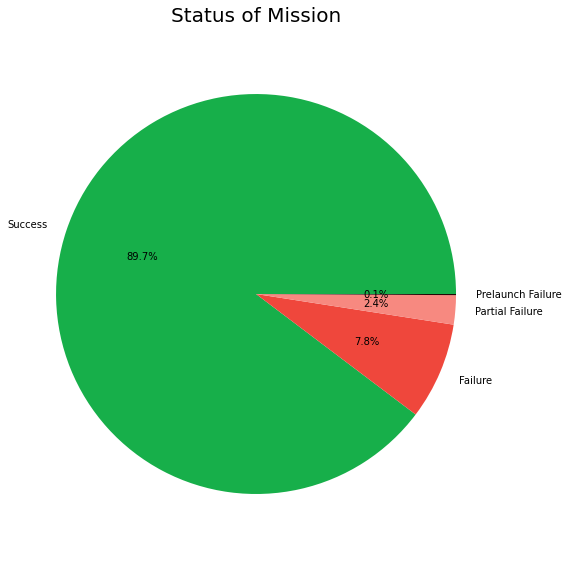

In [12]:
status = list(data['Status Mission'].value_counts().keys())
status_values = list(data['Status Mission'].value_counts())

colors = ['#17AF4A','#EF473C','#F78980','#250704']

plt.figure(figsize= (8,8))
plt.title('Status of Mission',fontsize = 20)
plt.pie(status_values, labels=status, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Status Mission', ylabel='count'>

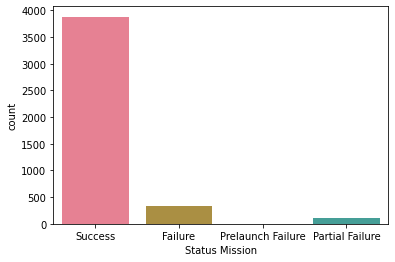

In [28]:
sns.countplot(data['Status Mission'])

In [14]:
data.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
Country              0
year                 0
dtype: int64

Majority of the organisations haven't disclosed their mission cost. Only 964 mission cost is available. Let's do the analysis with the available data.

In [15]:
#dictionary to help in mapping to get consistent and correct Country Names
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

In [16]:
data['Country'] = data['Country'].replace(countries_dict)

In [17]:
#extracting date-time features
data['Datum'] = pd.to_datetime(df['Datum'])
data['year'] = data['Datum'].apply(lambda datetime: datetime.year)
data['month'] = data['Datum'].apply(lambda datetime: datetime.month)
data['weekday'] = data['Datum'].apply(lambda datetime: datetime.weekday())

In [18]:
#function to get the Launch Vehicle Name from the Details
def getVehicles(detail):
    lv = []
    li = [x.strip() for x in detail.split('|')] #extracting the name of all launch vehicles from the Details section
    for ele in li:
        if('Cosmos' in ele):
            lv.append('Cosmos')
        elif('Vostok' in ele):
            lv.append('Vostok')
        elif('Tsyklon' in ele):
            lv.append('Tsyklon')
        elif('Ariane' in ele):
            lv.append('Ariane')
        elif('Atlas' in ele):
            lv.append('Atlas')
        elif('Soyuz' in ele):
            lv.append('Soyuz')
        elif('Delta' in ele):
            lv.append('Delta')
        elif('Titan' in ele):
            lv.append('Titan')
        elif('Molniya' in ele):
            lv.append('Molniya')
        elif('Zenit' in ele):
            lv.append('Zenit')
        elif('Falcon' in ele):
            lv.append('Falcon')
        elif('Long March' in ele):
            lv.append('Long March')
        elif('PSLV' in ele):
            lv.append('PSLV')
        elif('GSLV' in ele):
            lv.append('GSLV')
        elif('Thor' in ele):
            lv.append('Thor')
        else:
            lv.append('Other')
    return lv
data['Launch Vehicles'] = data['Detail'].apply(lambda x:getVehicles(x))

Since we are analyzing the reason why some space missions fail, let us first see the distribution of Status Mission. We can see that a large number(89.71%) of Space Missions are a Success and 7.84% of the Missions are a Failure. These 7.84% cases are the most important for our analysis.

## EDA

Text(0.5, 1.0, 'Total number of launches each year')

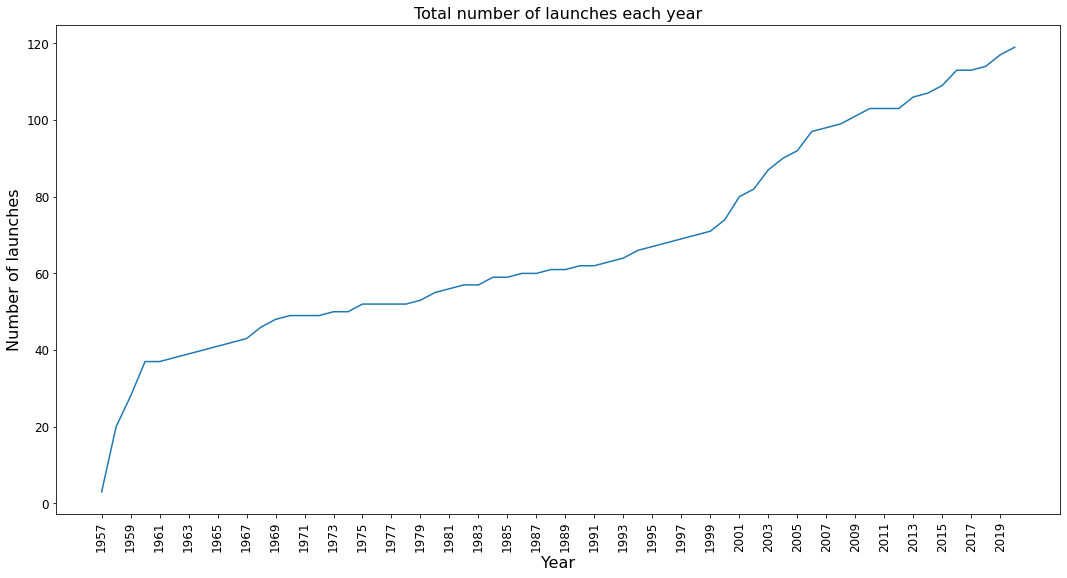

In [19]:
# Total number of launches each year
plt.figure(figsize=(18,9))
plt.plot(data['year'].unique(), data['year'].value_counts())
plt.xticks(rotation=90)
x_ticks = np.arange(1957, 2020, 2)
plt.xticks(x_ticks)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of launches', fontsize=16)
plt.tick_params(labelsize=12)
plt.title('Total number of launches each year', fontsize=16)

In [21]:
import seaborn as sns

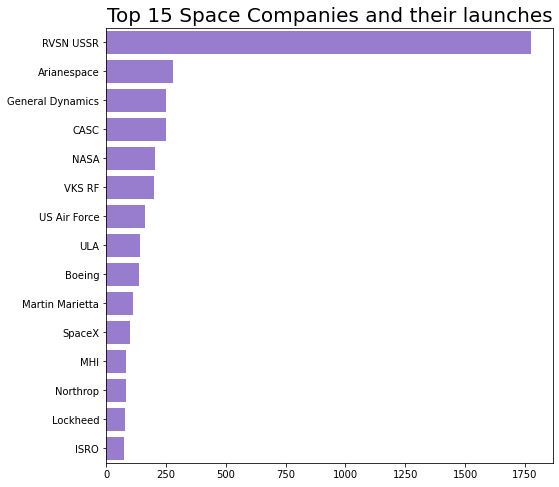

In [22]:
company_name = list(data['Company Name'].value_counts().keys())
values = list(data['Company Name'].value_counts())
company_name = company_name[:15]
values = values[:15]
plt.figure(figsize=(8,8))
sns.set_color_codes("pastel")
plt.title('Top 15 Space Companies and their launches', fontsize = 20)
sns.barplot(x= values, y= company_name,color = '#9370db');

RVSN USSR has the maximum launches. It is a very old company.
Strategic Missile Troops [ex-Raketnyye Voyska Strategicheskogo Naznacheniya (RVSN) are a military branch of the Russian Armed Forces that controls Russia's land-based intercontinental ballistic missiles (ICBMs). The RVSN was first formed in the Soviet Armed Forces, and when the USSR collapsed in December 1991, it effectively changed its name from the Soviet to the Russian Strategic Rocket Forces or Strategic Missile Troops.

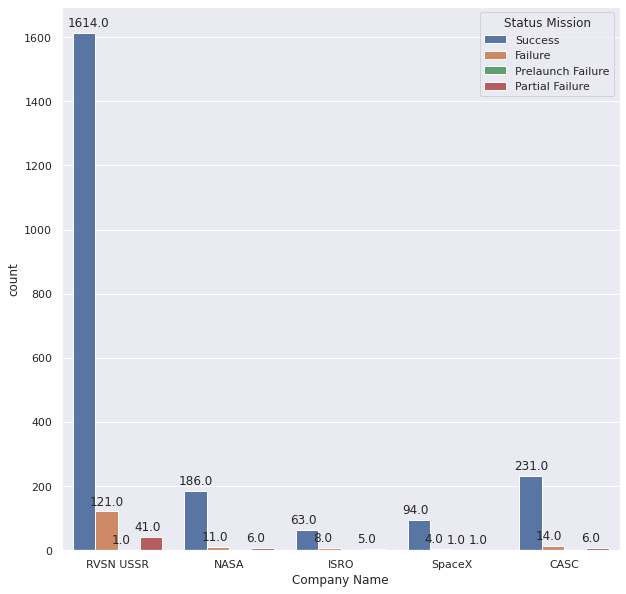

In [29]:
#comparing top companies failures and successes

plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'Company Name',data=data,order=['RVSN USSR','NASA','ISRO','SpaceX','CASC'],hue= "Status Mission",)
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()-0.05, p.get_height()+20))

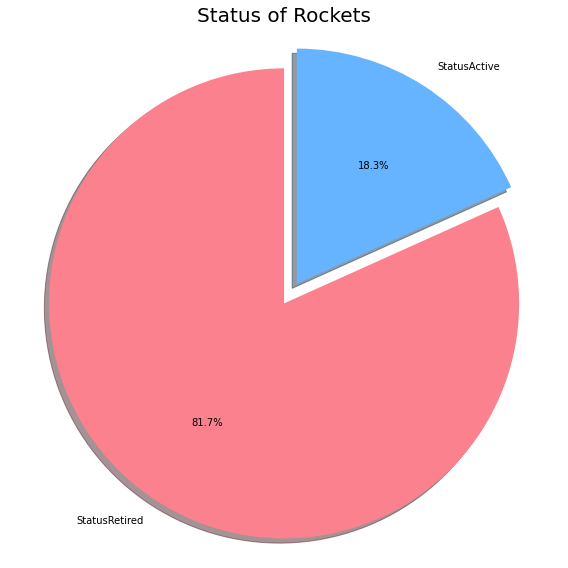

In [23]:
#status of the rockets

status = list(data['Status Rocket'].value_counts().keys())
status_values = list(data['Status Rocket'].value_counts())

explode = (0, 0.1)
colors = ['#FC818E','#66b3ff']

plt.figure(figsize= (8,8))
plt.title('Status of Rockets',fontsize = 20)
plt.pie(status_values, labels=status, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90,explode = explode)
plt.axis('equal')
plt.tight_layout()

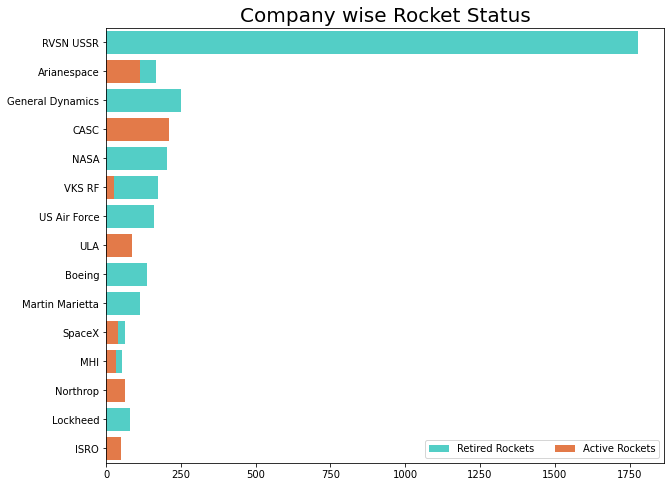

In [24]:
# company wise status of rockets

active = data[data['Status Rocket'] == 'StatusActive']
retired = data[data['Status Rocket'] == 'StatusRetired']
active_value = []
retired_value = []
for i in company_name:
    df1 = active[active['Company Name'] == i]
    active_value.append(len(df1))
    df2 = retired[retired['Company Name'] == i]
    retired_value.append(len(df2))
plt.figure(figsize=(10,8))
sns.barplot(x = retired_value, y= company_name,label="Retired Rockets", color = '#3FE2D8')
sns.barplot(x = active_value, y= company_name,label="Active Rockets", color = '#FD702F')
plt.title('Company wise Rocket Status',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

The China Aerospace Science and Technology Corporation (CASC) has the maximum number of active space missions followed by Arianespace.
Though USSR has the maximum launches, it was active from the 1930s until the state's collapse in 1991. Hence, none of their missions are active.

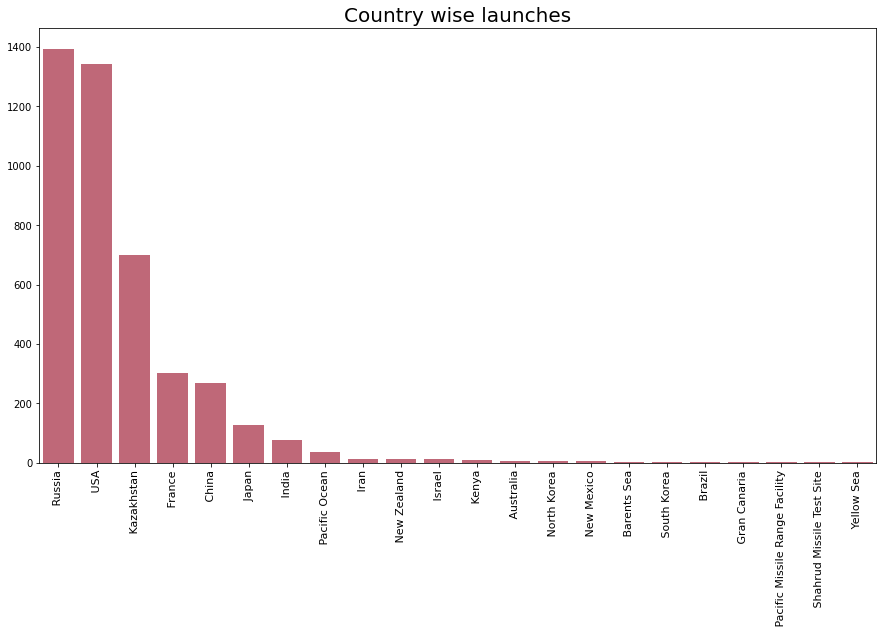

In [25]:
# country wise launches

countries = list(data['Country'].value_counts().keys())
values = list(data['Country'].value_counts())
plt.figure(figsize=(15,8))
sns.set_color_codes("pastel")
plt.title('Country wise launches', fontsize = 20)
plt.xticks(rotation = 90 ,fontsize = 11)
sns.barplot(x= countries, y= values,color = '#CE596F');

This ranking is based on the number of launches happended.

Top 10 countries in Space Technology as of 2018 is as follows (Source : ESRI)

USA

China

Russia

Japan

United Kingdom

India

Canada

Germany

France

Luxembourg

Kazakhstan having the 3rd maximum number of launches is because most of the rockets of Russia are launched from Kazakhstan hence that also comes under the count of Russion space missions. The Baikonur Cosmodrome is a space launch facility located in southern Kazakhstan. The spaceport is currently leased by the Kazakh Government to Russia until 2050, and is managed jointly by the Roscosmos State Corporation and the Russian Aerospace Forces.

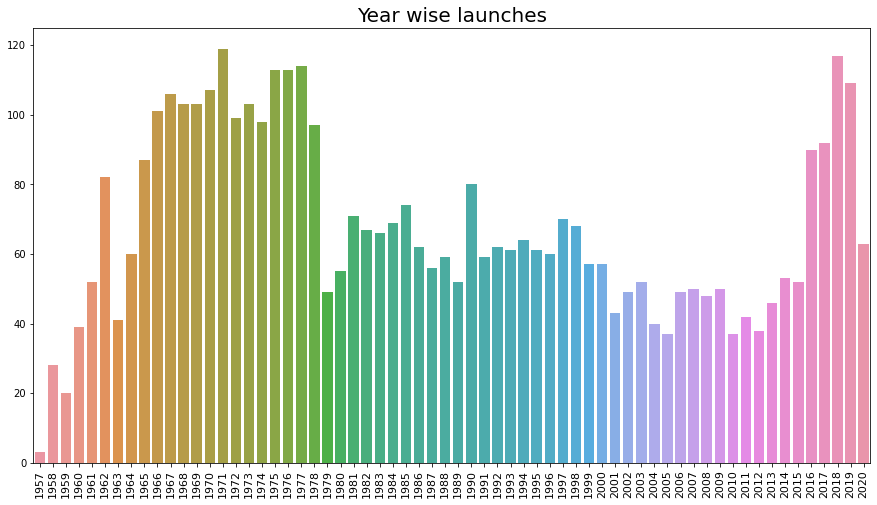

In [26]:
#year wise launches

sns.set_palette("husl")

year = list(data['year'].value_counts().keys())
values = list(data['year'].value_counts())
plt.figure(figsize=(15,8))
sns.set_color_codes("pastel")
plt.title('Year wise launches', fontsize = 20)
plt.xticks(rotation = 90 ,fontsize = 11)
sns.barplot(x= year, y= values);

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='year', ylabel='Density'>

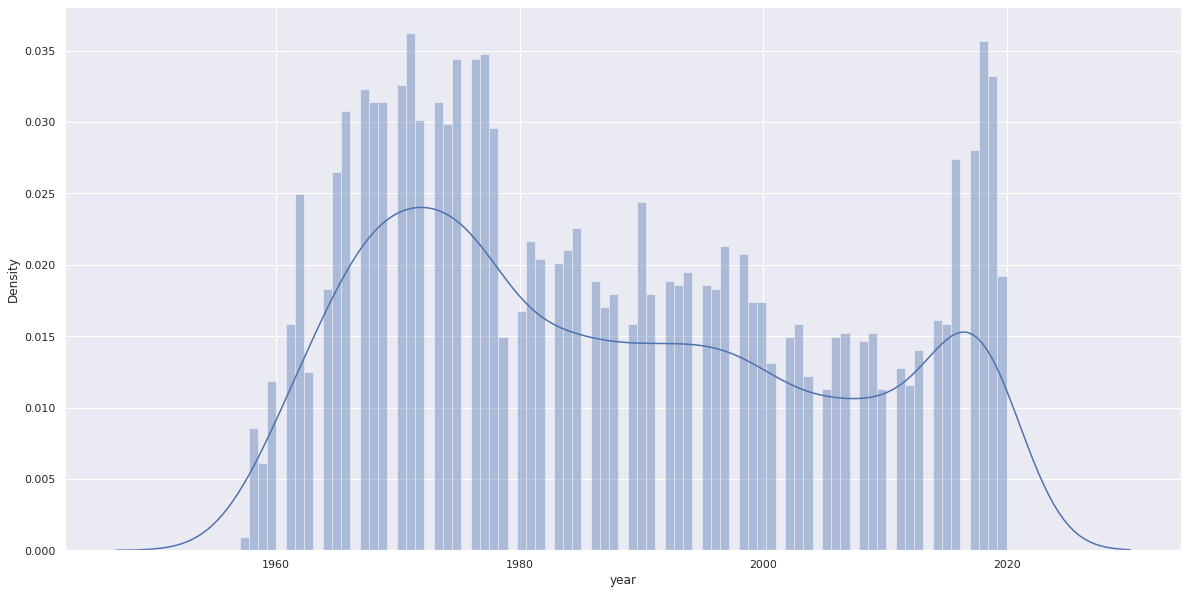

In [32]:
# visualizing the year wise change in the number of space missions
# data['Year'] = pd.to_datetime(data['Datum']).apply(lambda year: year.year)
plt.figure(figsize=(20,10))
sns.distplot(data['year'],bins = 83)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Cost of mission')

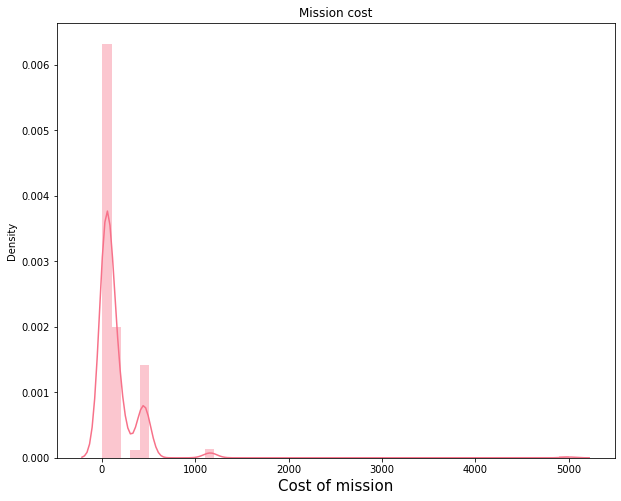

In [27]:
data[' Rocket']=data[' Rocket'].str.replace(',','')
data[' Rocket']=data[' Rocket'].astype(float)

cost = data.dropna()
plt.figure(figsize=(10,8))
sns.distplot(cost[' Rocket']);
plt.title('Mission cost')
plt.xlabel('Cost of mission',size=15)

In [33]:
import plotly.express as ex
import plotly.figure_factory as ff

In [35]:
data.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                       Datum                                        Detail  \
0  2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00+00:00                    Atlas V 541 | Perseverance   

  Status Rocket   Rocket Status Mission      Country  year  month  weekday  \
0  StatusActive    50.00        Success          USA  2020      8        4   
1  StatusActive    29.75        Success        China  2020      8        3   
2  StatusActive      NaN        Success          USA  2020      8        1   
3  StatusActive    65.00        Success   Kazakhstan  2020      7        3   
4  StatusActive   145.00        Success          USA  2020      7        3   

       Launch Vehicles  
0      [Falcon, Other]  
1  [Long March, Other]  
2       [Other, Other]  
3       [Other, Other]  
4       [Atlas, Other]

In [36]:
s_data = data

#creating the day of launch
s_data['LaunchDay'] = data['Datum'].apply(lambda x: x.weekday())
#creating the hour of launch
s_data['LaunchTime'] = data['Datum'].apply(lambda x: x.hour)
#creating the year of launch
s_data['LaunchYear'] = data['Datum'].apply(lambda x: x.year)
#creating the month of launch
s_data['LaunchMonth'] = data['Datum'].apply(lambda x: x.month)

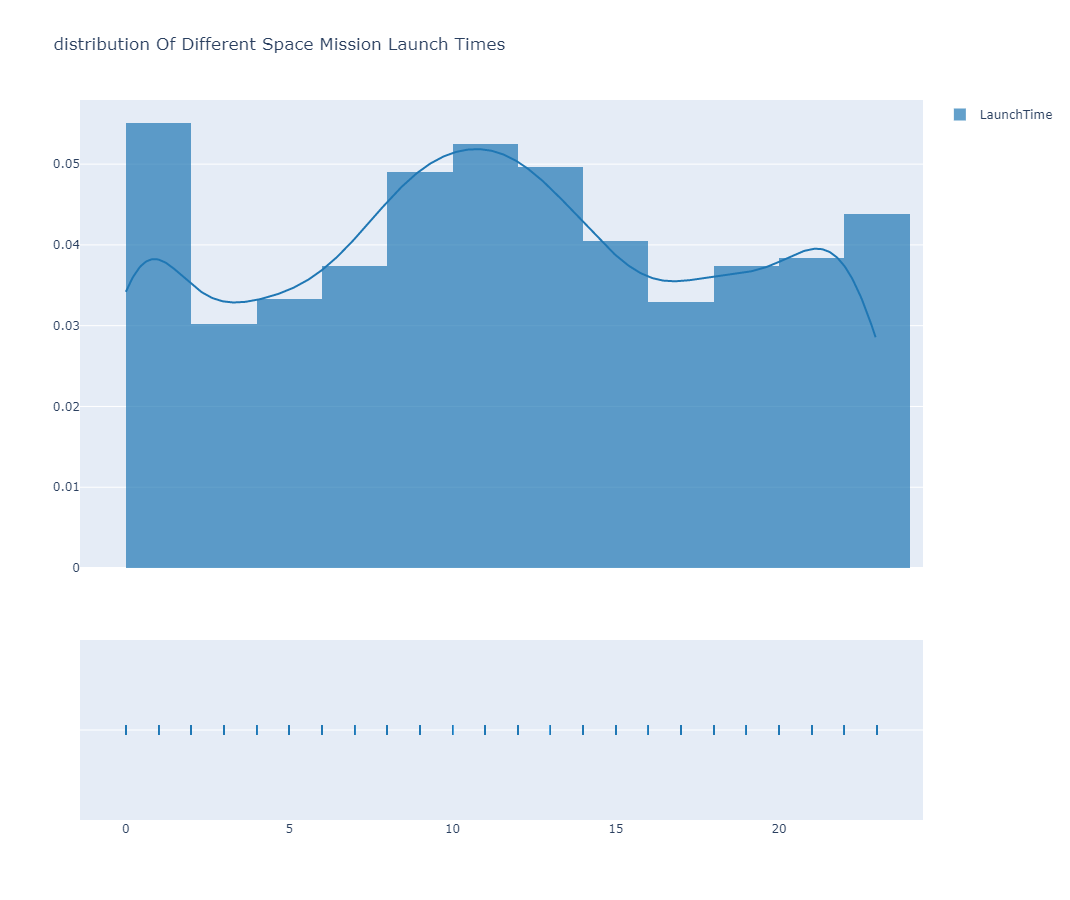

In [37]:
fig = ff.create_distplot([s_data['LaunchTime']],['LaunchTime'],curve_type='kde',bin_size=2)
fig.update_layout(title='distribution Of Different Space Mission Launch Times',height=900)
fig.show()

Most space missions were launched in around 2:30 am or between 20pm and 22pm or around 10 am as can be observed by the trimodal distribution above

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



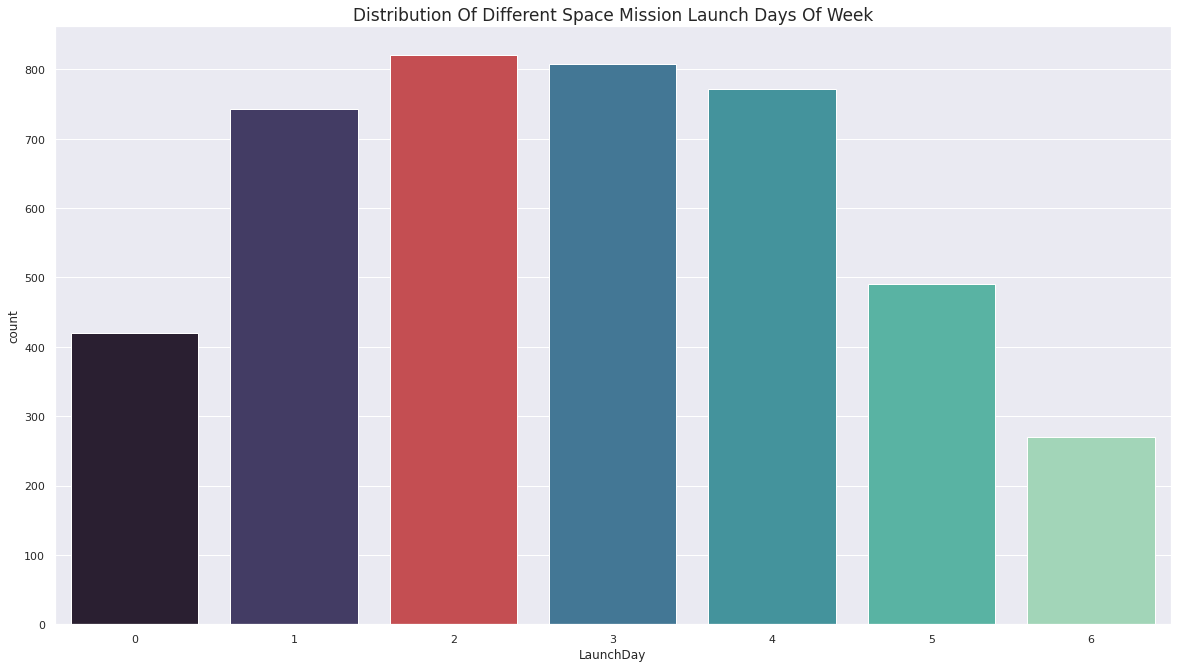

In [38]:
plt.figure(figsize=(20,11))
ax = sns.countplot(s_data['LaunchDay'],palette='mako')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
#ax.set_xlabel(ax.get_xlabel(),fontsize=16)
#ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Distribution Of Different Space Mission Launch Days Of Week',fontsize=17)
ax.patches[2].set_fc('r')
plt.show()


Colored in red we see that most mission are launched midweek where most of the mission were launched on Tuesday

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



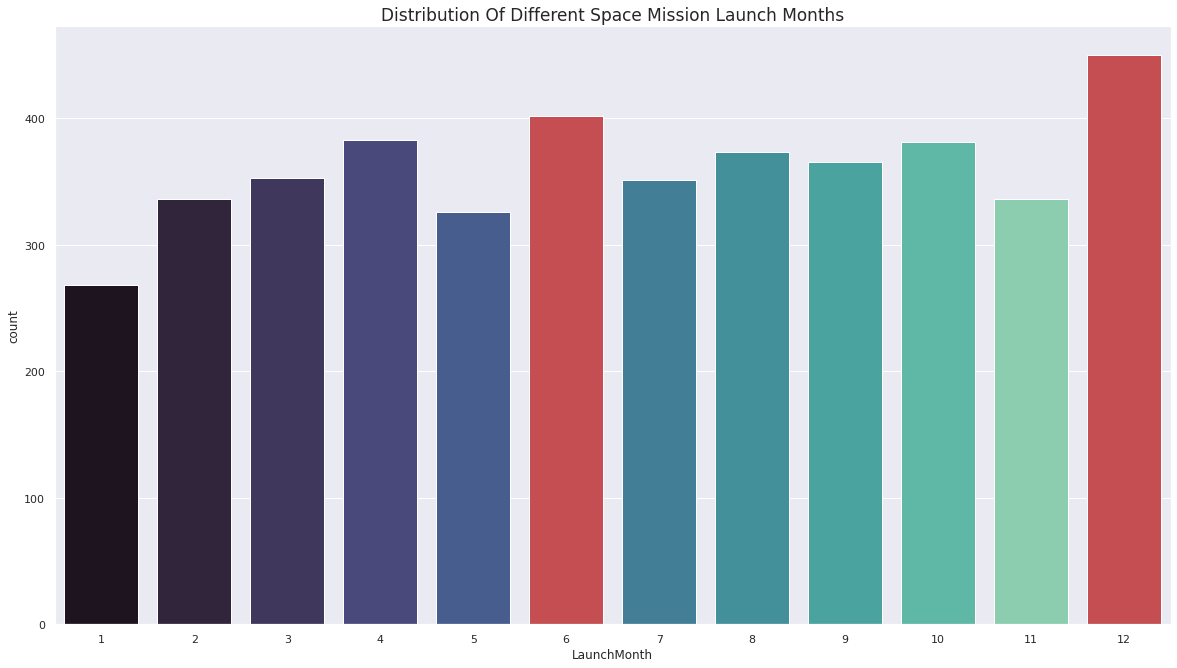

In [39]:
plt.figure(figsize=(20,11))
ax = sns.countplot(s_data['LaunchMonth'],palette='mako')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
#ax.set_xlabel(ax.get_xlabel(),fontsize=16)
#ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Distribution Of Different Space Mission Launch Months',fontsize=17)
ax.patches[5].set_fc('r')
ax.patches[11].set_fc('r')
plt.show()

A space mission is most likely to be launched in June of in December according to our data meaning once every 6 months.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



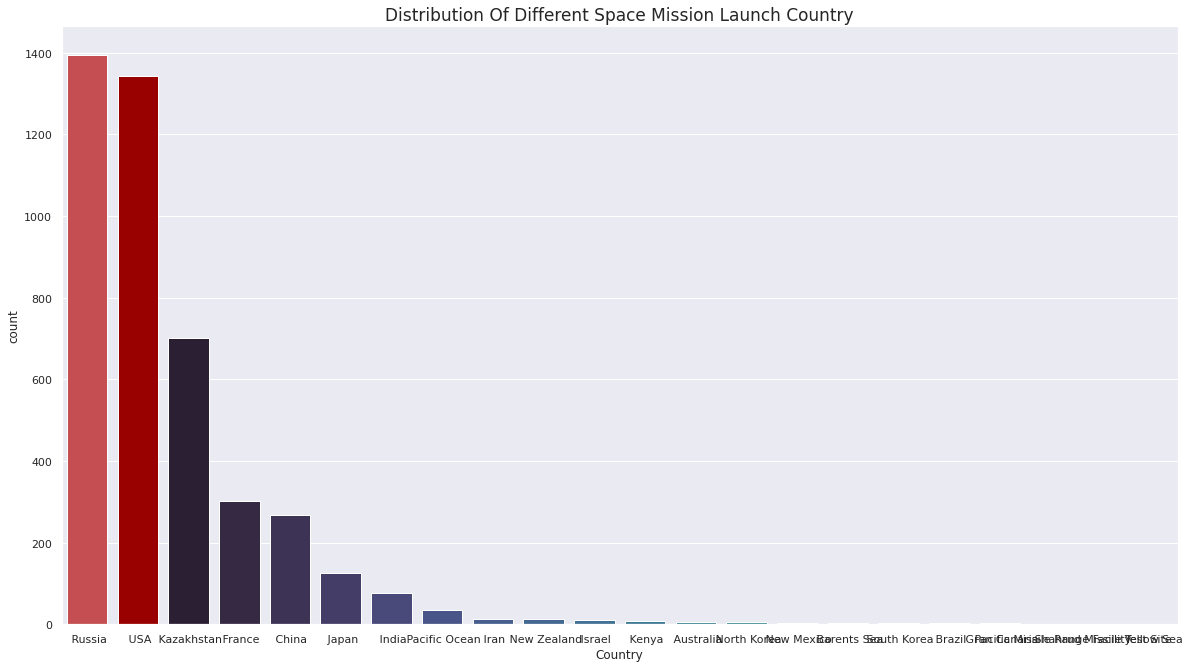

In [40]:
plt.figure(figsize=(20,11))
ax = sns.countplot(s_data['Country'],palette='mako',order=s_data['Country'].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
#ax.set_xlabel(ax.get_xlabel(),fontsize=16)
#ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Distribution Of Different Space Mission Launch Country',fontsize=17)
ax.patches[0].set_fc('r')
ax.patches[1].set_fc((0.6,0,0))
plt.show()


The majority of space mission were launched from Russia Or the USA

In [43]:
rockes_status_dict = {'StatusRetired':1,'StatusActive':2}
status_mission_dict = {'Prelaunch Failure':1,'Partial Failure':3,'Failure':2,'Success':4}

s_data['Status Rocket'].replace(rockes_status_dict,inplace=True)
s_data['Status Mission'].replace(status_mission_dict,inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



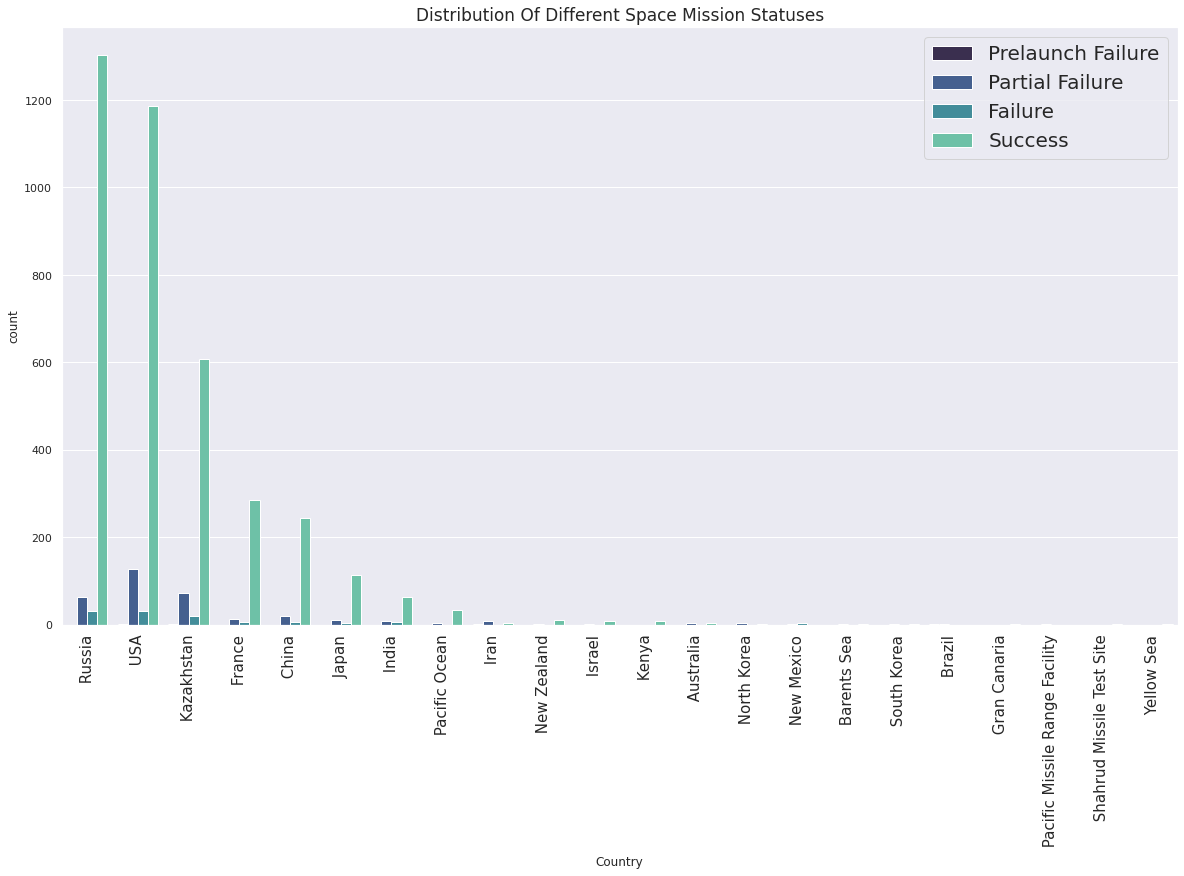

In [44]:
plt.figure(figsize=(20,11))
ax = sns.countplot(s_data['Country'],palette='mako',order=s_data['Country'].value_counts().index,hue=s_data['Status Mission'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
#ax.set_xlabel(ax.get_xlabel(),fontsize=16)
#ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Distribution Of Different Space Mission Statuses',fontsize=17)
plt.legend(labels=status_mission_dict.keys(),loc=1,prop={'size':20})
plt.show()

Most of the space mission launched in most of the countries are successful where the USA has the heighest number of Partial Failures

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



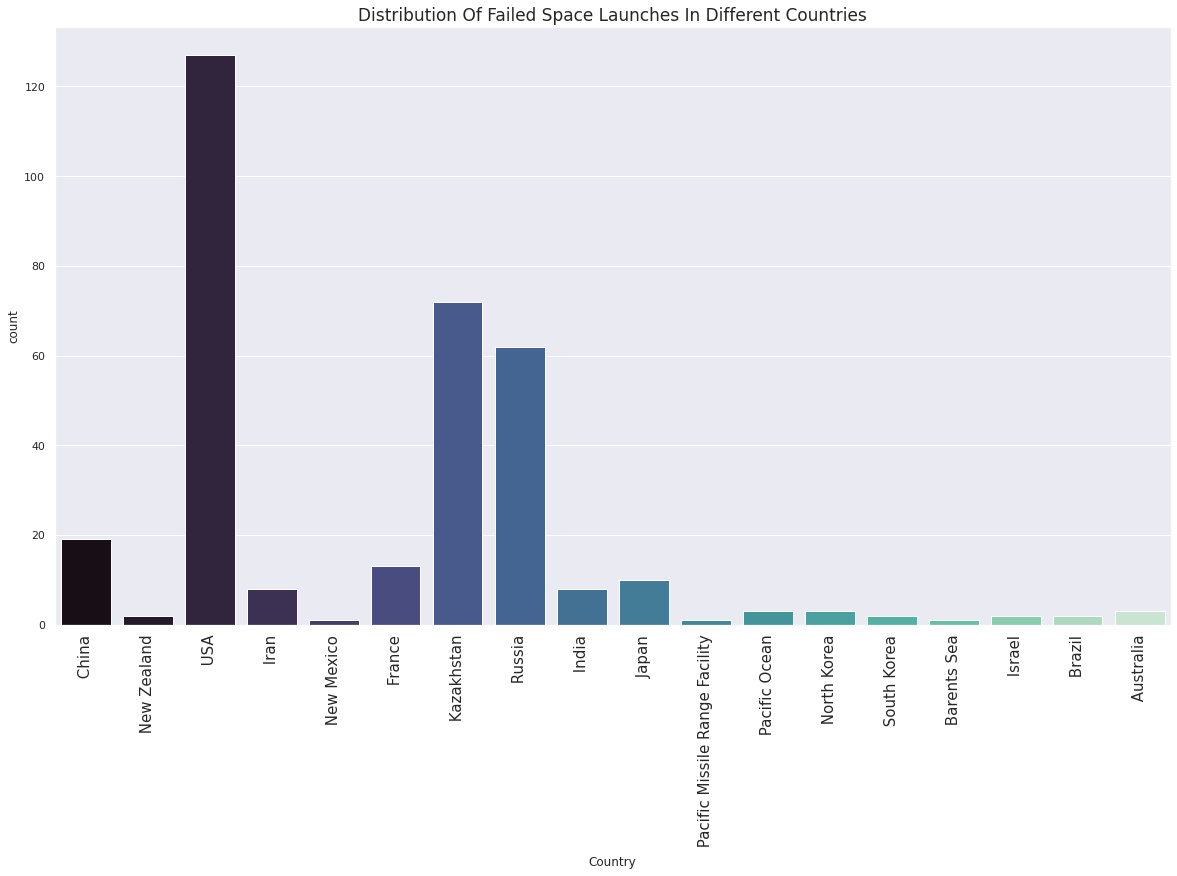

In [45]:
plt.figure(figsize=(20,11))
ax = sns.countplot(s_data[s_data['Status Mission'] == 2]['Country'],palette='mako')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
#ax.set_xlabel(ax.get_xlabel(),fontsize=16)
#ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Distribution Of Failed Space Launches In Different Countries',fontsize=17)
#plt.legend(labels=status_mission_dict.keys(),loc=1,prop={'size':20})
plt.show()

The Usa have the height amount of Failed on launch missions.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



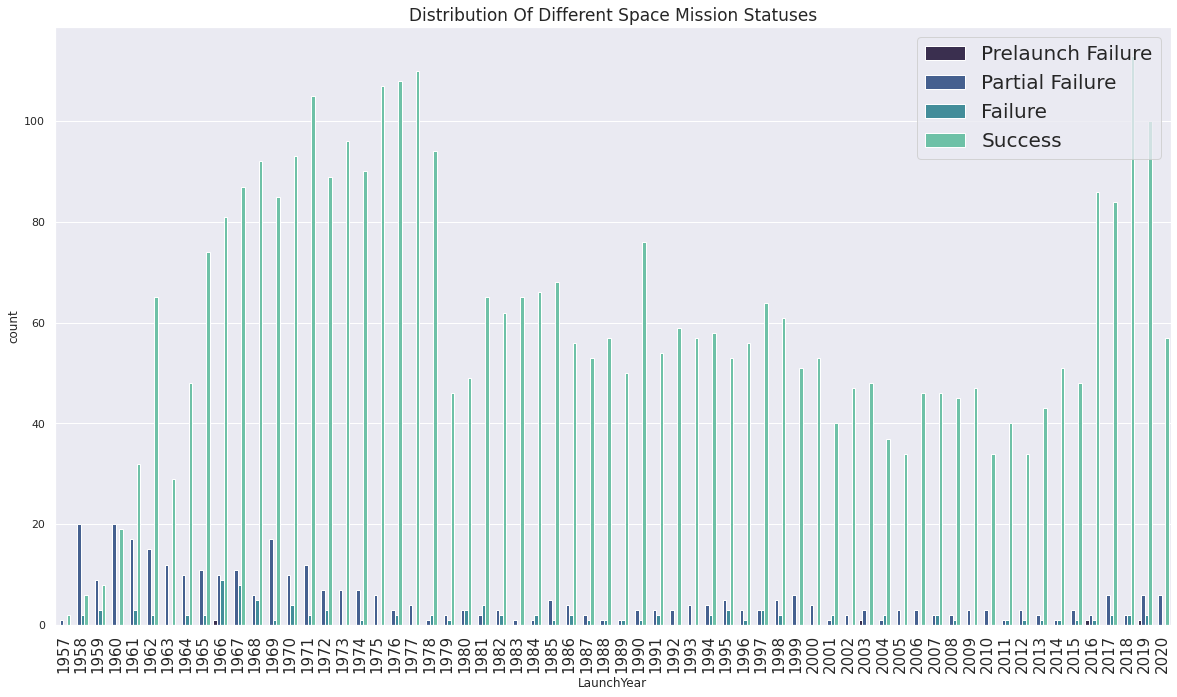

In [46]:
plt.figure(figsize=(20,11))
ax = sns.countplot(s_data['LaunchYear'],palette='mako',hue=s_data['Status Mission'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=15)
#ax.set_xlabel(ax.get_xlabel(),fontsize=16)
#ax.set_ylabel(ax.get_ylabel(),fontsize=16)
ax.set_title('Distribution Of Different Space Mission Statuses',fontsize=17)
plt.legend(labels=status_mission_dict.keys(),loc=1,prop={'size':20})
plt.show()

It is clear that in the early years meaning 1960-1976 there where more launches and of those there was a heigher precentage of Partial Failures in in comparison to the late 2000's where we have a hiegher success rate in mission launching and a lower rate of partial failures!

## Feature Correlations

In [48]:
#extract data with no missing values in the rocket price data
s_data_n = s_data[~s_data[' Rocket'].isna()].copy()
s_data_n[' Rocket'] = s_data_n[' Rocket'].replace('5,000.0 ',500)
s_data_n[' Rocket'] = s_data_n[' Rocket'].replace('1,160.0 ',116)
s_data[' Rocket'] = s_data[' Rocket'].replace('5,000.0 ',500)
s_data[' Rocket'] = s_data[' Rocket'].replace('1,160.0 ',116)

s_data_n[' Rocket'] = s_data_n[' Rocket'].astype('float64')
s_data[' Rocket'] = s_data[' Rocket'].astype('float64')

s_data_n

Company Name                                           Location  \
0           SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1             CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
3        Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
5             CASC       LC-9, Taiyuan Satellite Launch Center, China   
...            ...                                                ...   
3855  US Air Force            SLC-4W, Vandenberg AFB, California, USA   
3971  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
3993  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
4000  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   
4020  US Air Force           SLC-20, Cape Canaveral AFS, Florida, USA   

                          Datum  \
0     2020-08-07 05:12:00+00:00   
1     2020-08-06 04:01:00+00:00   
3     2020-07-30 21:25:00+00:00   
4     2020-07-30 11:50:00+00:00   
5     2020-07-25 03:13:00+00:00   
...                         ...   
3855  1966-07-29 18:43:00+00:00   
3971  1965-05-06 15:00:00+00:00   
3993  1965-02-11 15:19:00+00:00   
4000  1964-12-10 16:52:00+00:00   
4020  1964-09-01 15:00:00+00:00   

                                                 Detail  Status Rocket  \
0          Falcon 9 Block 5 | Starlink V1 L9 & BlackSky              2   
1                   Long March 2D | Gaofen-9 04 & Q-SAT              2   
3          Proton-M/Briz-M | Ekspress-80 & Ekspress-103              2   
4                            Atlas V 541 | Perseverance              2   
5     Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...              2   
...                                                 ...            ...   
3855                                  Titan IIIB | KH-8              1   
3971                         Titan IIIA | LES 2 & LCS 1              1   
3993                                 Titan IIIA | LES 1              1   
4000                           Titan IIIA | Transtage 2              1   
4020                           Titan IIIA | Transtage 1              1   

       Rocket  Status Mission      Country  year  month  weekday  \
0       50.00               4          USA  2020      8        4   
1       29.75               4        China  2020      8        3   
3       65.00               4   Kazakhstan  2020      7        3   
4      145.00               4          USA  2020      7        3   
5       64.68               4        China  2020      7        5   
...       ...             ...          ...   ...    ...      ...   
3855    59.00               4          USA  1966      7        4   
3971    63.23               4          USA  1965      5        3   
3993    63.23               4          USA  1965      2        3   
4000    63.23               4          USA  1964     12        3   
4020    63.23               2          USA  1964      9        1   

          Launch Vehicles  LaunchDay  LaunchTime  LaunchYear  LaunchMonth  
0         [Falcon, Other]          4           5        2020            8  
1     [Long March, Other]          3           4        2020            8  
3          [Other, Other]          3          21        2020            7  
4          [Atlas, Other]          3          11        2020            7  
5     [Long March, Other]          5           3        2020            7  
...                   ...        ...         ...         ...          ...  
3855       [Titan, Other]          4          18        1966            7  
3971       [Titan, Other]          3          15        1965            5  
3993       [Titan, Other]          3          15        1965            2  
4000       [Titan, Other]          3          16        1964           12  
4020       [Titan, Other]          1          15        1964            9  

[964 rows x 16 columns]

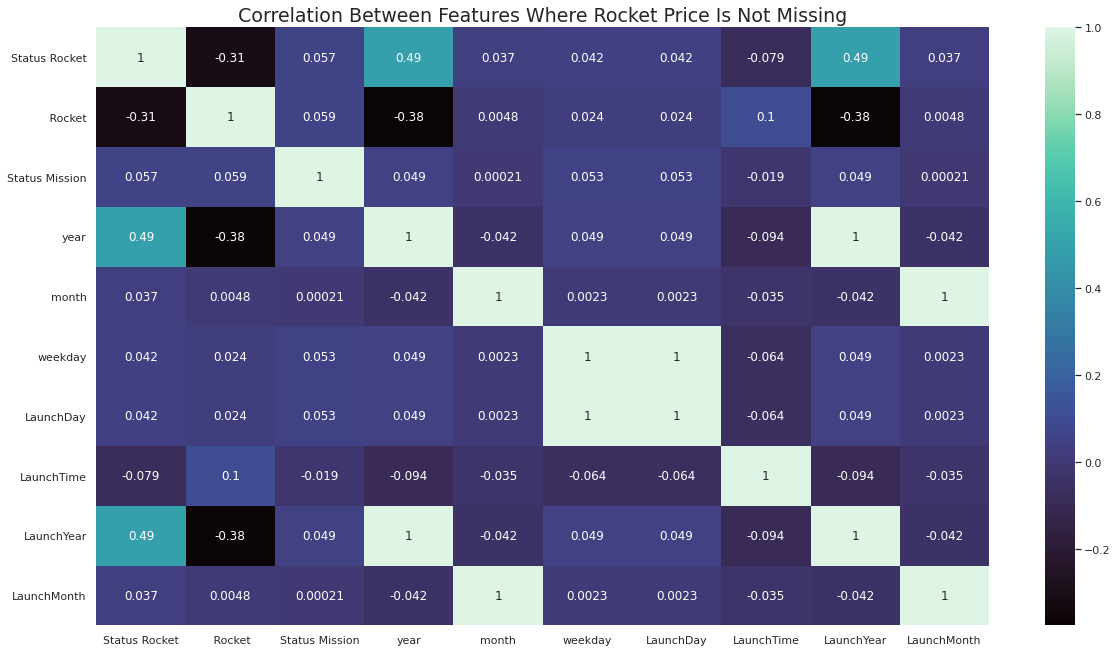

In [49]:
sn_cor = s_data_n.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(sn_cor,annot=True,cmap='mako')
ax.set_title('Correlation Between Features Where Rocket Price Is Not Missing',fontsize=19)
plt.show()

Apparently we see that we have fair correlation between the rocket price and the status of the rocket as well as between the launch year and the status and the launch year and the rocket price. this is a key insight for us in order to predict the rocekt price.

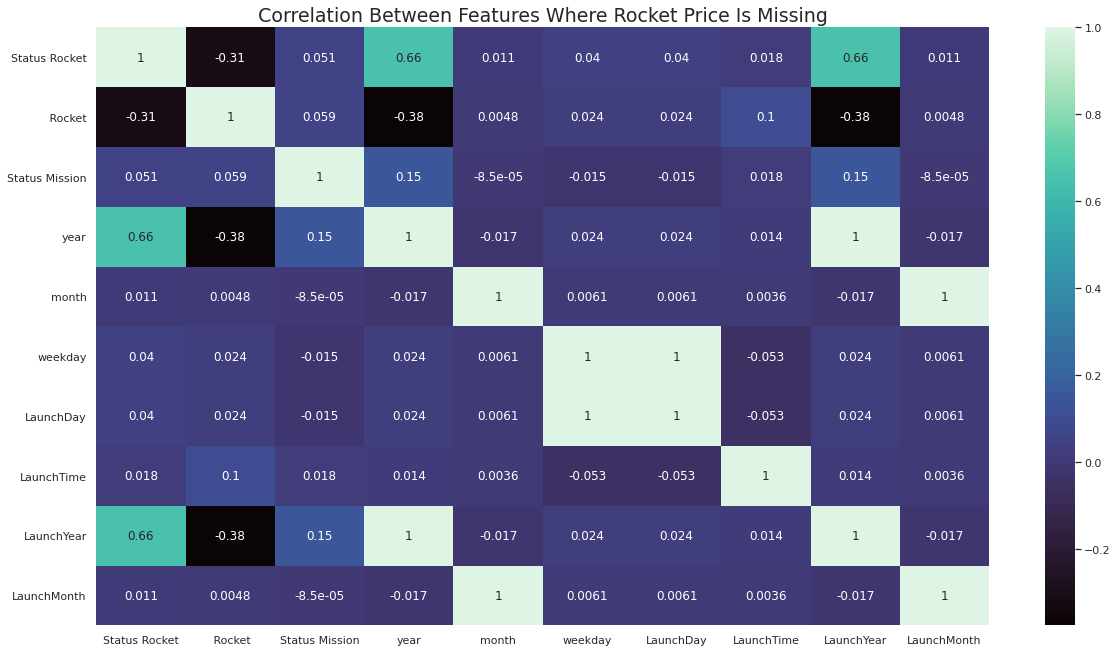

In [50]:
sn_cor = s_data.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(sn_cor,annot=True,cmap='mako')
ax.set_title('Correlation Between Features Where Rocket Price Is Missing',fontsize=19)
plt.show()

When looking in the whole data including the missing price values we see that it confirms the correlation we saw in the smaller sample of this population in the perivous heatmap shown above